# Datalog loader

In [1207]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.integrate import cumtrapz
import matplotlib.mlab as mlab

In [1208]:
#my_data = np.genfromtxt('DATALOG1.TXT', delimiter=',')
#my_data = np.genfromtxt('DATALOG-leftright.TXT', delimiter=',')
#my_data = np.genfromtxt('DATALOG-updn.TXT', delimiter=',')
#my_data = np.genfromtxt('DATALOG-cal-4.66mm.TXT', delimiter=',')
#my_data = np.genfromtxt('DATALOG-plywood.TXT', delimiter=',')
#my_data = np.genfromtxt('DATALOG-2x6.TXT', delimiter=',')
#my_data = np.genfromtxt('DATALOG-2x6-alpha1.TXT', delimiter=',')
#my_data = np.genfromtxt('DATALOG-2x6-alpha1-slow.TXT', delimiter=',')
#my_data = np.genfromtxt('DATALOG-2x6-alpha1-slow-short.TXT', delimiter=',')
my_data = np.genfromtxt('DATALOG-string-pull.TXT', delimiter=',')
my_data.shape

(236, 31)

In [1209]:
t = my_data[:,0] - my_data[0,0]  # in milliseconds
t[-1]

28732.0

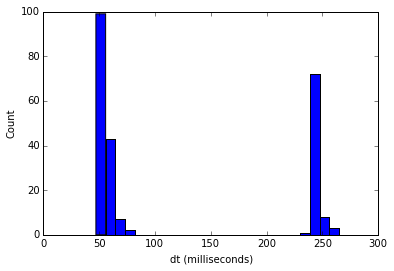

In [1210]:
dt = np.diff(t)
plt.hist(dt,25)
plt.xlabel("dt (milliseconds)")
plt.ylabel("Count")

In [1211]:
leftMotorCounter = my_data[:,1]
rightMotorCounter = my_data[:,2]

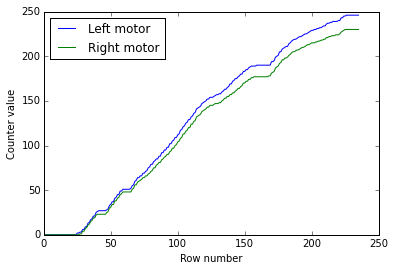

In [1212]:
plt.plot(leftMotorCounter-leftMotorCounter[0], label="Left motor")
plt.hold(True)
plt.plot(rightMotorCounter-rightMotorCounter[0], label="Right motor")
plt.legend(loc="upper left")
plt.xlabel("Row number")
plt.ylabel("Counter value")

In [1213]:
frontCm = my_data[:,3]  # ping

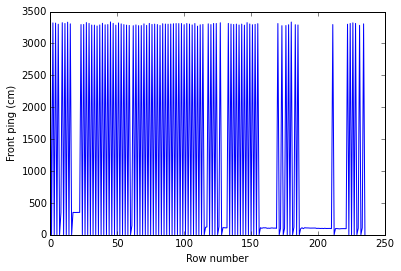

In [1214]:
plt.plot(frontCm)
plt.xlabel("Row number")
plt.ylabel("Front ping (cm)")

In [1215]:
temp = my_data[:,4][0] # Celsius
eulerX = my_data[:,5]  # deg
eulerY = my_data[:,6]
eulerZ = my_data[:,7]
accelX = my_data[:,8]  # m/s/s
accelY = my_data[:,9]
accelZ = my_data[:,10]
sysCal = my_data[:,11] # 0..3
gyroCal = my_data[:,12]
accelCal = my_data[:,13]
magCal = my_data[:,14]
temp

22.0

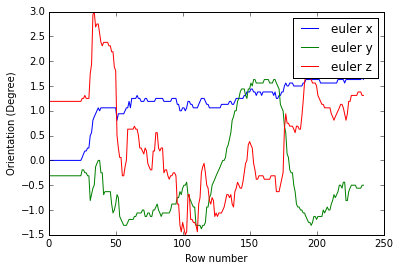

In [1216]:
plt.plot(eulerX, label="euler x")
plt.hold(True)
plt.plot(eulerY, label="euler y")
plt.plot(eulerZ, label="euler z")
plt.legend()
plt.xlabel("Row number")
plt.ylabel("Orientation (Degree)")

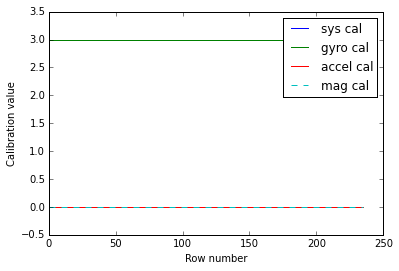

In [1217]:
plt.plot(sysCal, label="sys cal")
plt.hold(True)
plt.plot(gyroCal, label="gyro cal")
plt.plot(accelCal, label="accel cal")
plt.plot(magCal, '--', label="mag cal")
plt.legend(loc="upper right")
plt.ylim([-0.5,3.5])
plt.xlabel("Row number")
plt.ylabel("Calibration value")

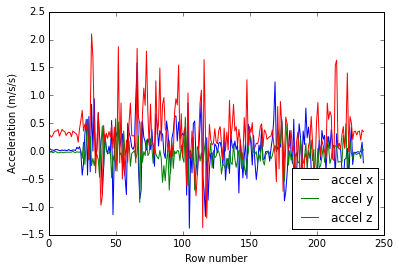

In [1218]:
plt.plot(accelX, label="accel x")
plt.hold(True)
plt.plot(accelY, label="accel y")
plt.plot(accelZ, label="accel z")
plt.legend(loc="lower right")
plt.xlabel("Row number")
plt.ylabel("Acceleration (m/s/s)")

In [1219]:
ms_to_s = 1e-3
velocityX = cumtrapz(accelX, x=t) * ms_to_s
velocityY = cumtrapz(accelY, x=t) * ms_to_s
velocityZ = cumtrapz(accelZ, x=t) * ms_to_s
x = cumtrapz(velocityX, x=t[:-1]) * ms_to_s
y = cumtrapz(velocityY, x=t[:-1]) * ms_to_s
z = cumtrapz(velocityZ, x=t[:-1]) * ms_to_s

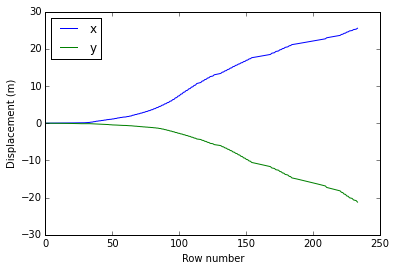

In [1220]:
plt.plot(x, label='x')
plt.hold(True)
plt.plot(y, label='y')
#plt.plot(z, label='z')
plt.legend(loc="upper left")
plt.xlabel("Row number")
plt.ylabel("Displacement (m)")

Getting position from accelerometer data is useless because the errors blow up.

In [1221]:
adc = my_data[:,15:]
print adc.shape
adc

(236, 16)


array([[ 224.,  224.,  255., ...,  248.,  244.,  260.],
       [ 217.,  226.,  245., ...,  252.,  257.,  264.],
       [ 222.,  234.,  251., ...,  246.,  245.,  260.],
       ..., 
       [ 269.,  277.,  289., ...,  258.,  271.,  283.],
       [ 266.,  276.,  288., ...,  253.,  269.,  290.],
       [ 274.,  276.,  291., ...,  259.,  273.,  290.]])

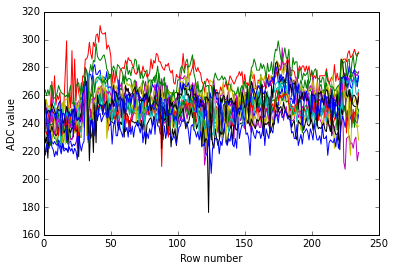

In [1222]:
plt.plot(adc)
plt.xlabel("Row number")
plt.ylabel("ADC value")

In [1223]:
# # Calibration (only run this code on calibration data)
# adc_0mm = np.mean(adc[30:70], axis=0)
# adc_4p6mm = np.mean(adc[220:300], axis=0)
# adc_over_h = (h_4p6mm-h_0mm)/4.6  # slope: adc counts per millimeter
# h_over_adc = 4.6/(h_4p6mm-h_0mm)  # slope: millimeters per adc count
# print "Raw ADC counts (ch 0 to 15)"
# print adc_0mm
# print "Raw ADC counts with 4.6mm clip board (ch 0 to 15)"
# print adc_4p6mm
# print "ADC counts per millimeter (ch 0 to 15):"
# print adc_over_h
# print "Millimeters per ADC count (ch 0 to 15):"
# print h_over_adc

Raw ADC counts (ch 0 to 15)
[ 246.309    251.82875  265.08475  252.15275  247.945    253.684    249.304
  241.006    252.499    251.72375  252.776    261.895    256.227    250.52175
  246.6695   258.28925]
Raw ADC counts with 4.6mm clip board (ch 0 to 15)
[ 268.676     277.027875  292.49825   281.80225   272.106625  279.667
  276.124875  270.365875  279.612625  279.378125  279.876625  292.097
  283.714125  278.12525   275.786875  288.551625]
ADC counts per millimeter (ch 0 to 15):
[ 4.8623913   5.47807065  5.95945652  6.44554348  5.25252717  5.64847826
  5.830625    6.38258152  5.8942663   6.01182065  5.89144022  6.56565217
  5.97546196  6.00076087  6.32986413  6.57877717]
Millimeters per ADC count (ch 0 to 15):
[ 0.20566012  0.18254602  0.16780054  0.15514596  0.19038455  0.17703883
  0.1715082   0.15667642  0.1696564   0.16633896  0.16973778  0.15230779
  0.16735108  0.16664553  0.15798127  0.15200393]

In [1224]:
def adc_to_h(adc):
    '''
    Conversion from ADC value to height in millimeters
    adc = input whose dimensions are (#rows, 16)
    '''
    # Raw ADC counts at 0 mm (ch 0 to 15)
    adc_0mm = [246.30900, 251.82875, 265.08475, 252.15275, 
               247.94500, 253.68400, 249.30400, 241.00600,
               252.49900, 251.72375, 252.77600, 261.89500,
               256.22700, 250.52175, 246.66950, 258.28925]
    # Millimeters per ADC count (ch 0 to 15)
    h_over_adc = [0.20566012, 0.18254602, 0.16780054, 0.15514596,
                  0.19038455, 0.17703883, 0.17150820, 0.15667642,
                  0.16965640, 0.16633896, 0.16973778, 0.15230779,
                  0.16735108, 0.16664553, 0.15798127, 0.15200393]
    h = []
    adc_0mm = adc[0]
    for adc_row in adc:  # adc_row.shape = (16,)
        # Sign: increase in ADC is decrease in range
        # Since height is measured from zero, flip sign again
        h.append(h_over_adc * (adc_row - adc_0mm))
    return np.array(h)

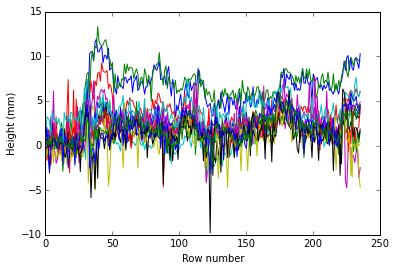

In [1225]:
plt.plot(adc_to_h(adc))
plt.xlabel("Row number")
plt.ylabel("Height (mm)")

## Trajectory using np.roll (assumes constant speed)

In [1226]:
print adc.shape

(236, 16)


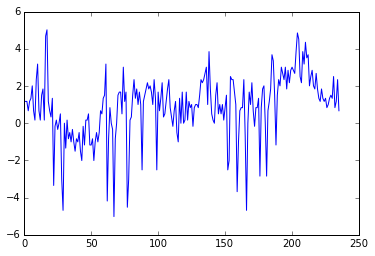

In [1249]:
plt.plot(np.roll(adc_to_h(adc)[:,12],30))

# plt.plot(np.roll(adc_to_h(adc)[:,0],30))
# plt.plot(np.roll(adc_to_h(adc)[:,1],0))
# plt.plot(np.roll(adc_to_h(adc)[:,2],-30))
# plt.plot(np.roll(adc_to_h(adc)[:,4],-60))

#plt.plot(np.roll(adc_to_h(adc)[:,5],30))
#plt.plot(np.roll(adc_to_h(adc)[:,6],0))
#plt.plot(np.roll(adc_to_h(adc)[:,7],-30))
#plt.plot(np.roll(adc_to_h(adc)[:,8],-60))

#plt.plot(np.roll(adc_to_h(adc)[:,8],30))
#plt.plot(np.roll(adc_to_h(adc)[:,9],0))
#plt.plot(np.roll(adc_to_h(adc)[:,10],-30))
#plt.plot(np.roll(adc_to_h(adc)[:,11],-60))

#plt.plot(np.roll(adc_to_h(adc)[:,12],30))
#plt.plot(np.roll(adc_to_h(adc)[:,13],0))
#plt.plot(np.roll(adc_to_h(adc)[:,14],-30))
#plt.plot(np.roll(adc_to_h(adc)[:,15],-60))


## Trajectory from Encoder Only

Distance per encoder tic = 10.2101761242 mm


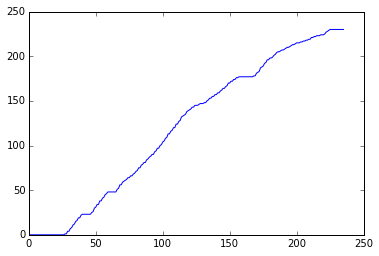

In [1228]:
# Wheel diameter = 65 mm
# Wheel separation = 130 mm
# ch0 is ~240 mm in front of the drive wheels
# 20 slot encoder wheel
distance_per_encoder_tic = np.pi*65/20  # mm
print "Distance per encoder tic =", distance_per_encoder_tic, "mm"
# A bit course: about 1 cm per tick.  Need finer resolution.

# derivedOrientation = difference between left and right motor counters
#derivedOrientation = leftMotorCounter-rightMotorCounter
#plt.plot(derivedOrientation)
# assume that the robot drives in a perfect line
# just look at rightMotorCounter
#plt.plot(rightMotorCounter, adc_to_h(adc))
plt.plot(rightMotorCounter)

## Trajectory

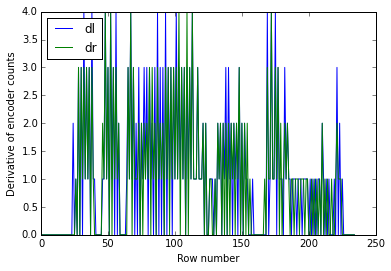

In [1229]:
dl = np.diff(leftMotorCounter)
dr = np.diff(rightMotorCounter)
plt.plot(dl, label="dl")
plt.plot(dr, label="dr")
plt.legend(loc="upper left")
plt.ylabel("Derivative of encoder counts")
plt.xlabel("Row number")

In [1230]:
forw = np.array((dl>0) & (dr>0))
back = np.array((dl<0) & (dr<0))
left = np.array(((dl<0) & (dr>0)) | ((dl==0) & (dr>0)) | ((dl<0) & (dr==0)))
right = np.array(((dl>0) & (dr<0)) | ((dl==0) & (dr<0)) | ((dl>0) & (dr==0)))
stop = np.array((dl==0) & (dr==0))

In [1231]:
direction_string = ''
for f,b,l,r,s in zip(forw, back, left, right, stop):
    if f:  direction_string += 'F'
    elif b:  direction_string += 'B'
    elif l:  direction_string += 'L'
    elif r:  direction_string += 'R'
    elif s:  direction_string += 'S'
    else:    direction_string += '-'
direction_string

'SSSSSSSSSSSSSSSSSSSSSSSSRSFSFSFLFFFFFSFFRSSSSSFFFFFSFRFLFLFSSSSSRFFFRFLFLFSFRFFFLFRFLFSFLFLFSFLFRFLFFFFFRFFFSFRFFFFFFFFFFFSFSSFFRSFSFFFSFRFSFRFLFRFLFSFSFRFSLSRSSSSSSSSLSFLFFFFFLFRFRLFFFFRLFRFLFRFLFRFFSRLRLRLRFSFRLRLRSLSRLFLFLRSSSSSSSSS'

In [1232]:
# Get the average forward encoder counts and the corresponding orientations
davg = (dl + dr)/2  # dl=diff(leftMotorCounter) and dr=diff(rightMotorCounter)
d = davg[forw]      # encoder counts.  20 = 1 revolution of the wheel
ori = eulerX[forw]  # deg
print len(d), len(ori), len(forw)

98 98 235


In [1233]:
enc_counts_to_distance = np.pi*60e-3/20.  # meters per encoder count
print enc_counts_to_distance, "meters per encoder count"

dx = d * np.cos(np.deg2rad(ori)) * enc_counts_to_distance
dy = d * np.sin(np.deg2rad(ori)) * enc_counts_to_distance

0.00942477796077 meters per encoder count


(0.0, 2.0, 0.0, 0.040000000000000001)

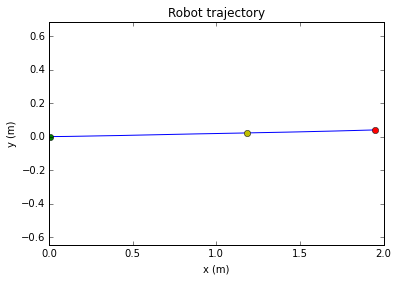

In [1234]:
x = np.cumsum(dx)
y = np.cumsum(dy)
plt.plot(x,y)
plt.hold(True)
plt.plot(x[0],y[0],'go')
#plt.plot(x[100],y[100],'co')
midpt = len(x)/2
plt.plot(x[midpt],y[midpt],'yo')
#plt.plot(x[300],y[300],'mo')
plt.plot(x[-1],y[-1],'ro')
plt.title('Robot trajectory')
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.axis("equal")

<matplotlib.colorbar.Colorbar instance at 0x1494f5488>

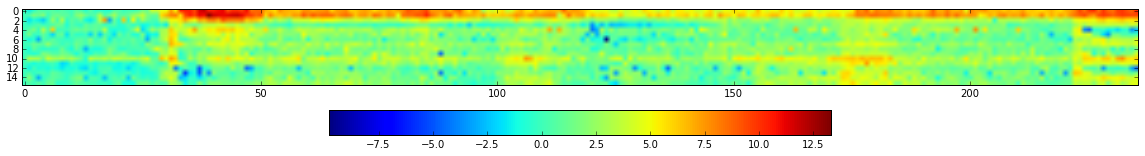

In [1235]:
# ADC values (entire data record) without any filtering
plt.figure(figsize=(20, 3))
plt.imshow(np.transpose(adc_to_h(adc)))
#plt.clim((-1.0, 2.0))
plt.colorbar(orientation="horizontal")

<matplotlib.colorbar.Colorbar instance at 0x1498067a0>

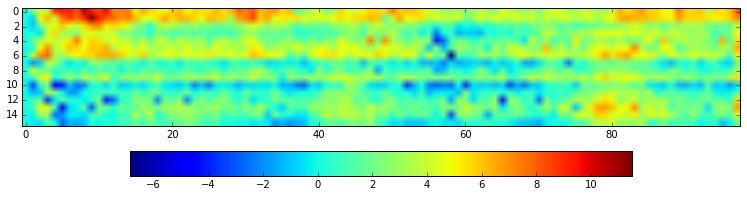

In [1236]:
# ADC values without any filtering -- the forward moving values
plt.figure(figsize=(20, 3))
# ref = adc_to_h(adc[forw])[10]  # calibrate heights at flat location (for plywood data)
ref = np.zeros(16)           # disable calibration
plt.imshow(np.transpose(adc_to_h(adc[forw])-ref))
plt.colorbar(orientation="horizontal")

## Bandpass filtering

In [1237]:
def bpf(input_signal):
    Wn = [0.1,0.5]  # Wn = 1 is the Nyquist frequency
    N = 8
    b, a = scipy.signal.butter(N, Wn, 'bandpass')
    output_signal = scipy.signal.filtfilt(b, a, input_signal)
    return output_signal
adc_bpf = []
for adc0 in np.transpose(adc):
    adc_bpf.append(bpf(adc0))
adc_bpf = np.transpose(adc_bpf)
print adc.shape, adc_bpf.shape

(236, 16) (236, 16)


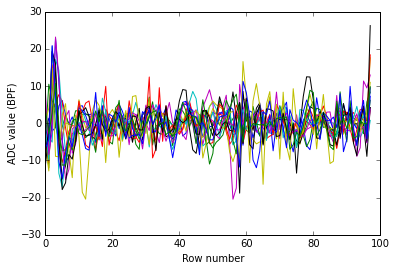

In [1238]:
plt.plot(adc_bpf[forw])
plt.xlabel("Row number")
plt.ylabel("ADC value (BPF)")

<matplotlib.colorbar.Colorbar instance at 0x149320638>

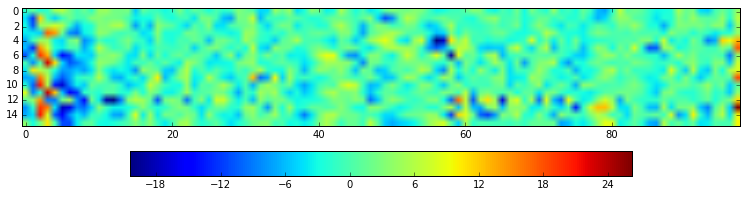

In [1239]:
plt.figure(figsize=(20, 3))
plt.imshow(np.transpose(adc_bpf[forw]))
plt.colorbar(orientation="horizontal")

<matplotlib.colorbar.Colorbar instance at 0x1411192d8>

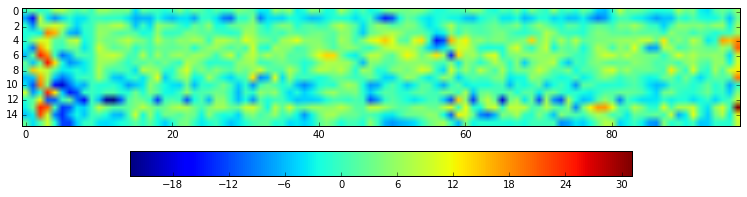

In [1240]:
# Normalize across a row so that all sensors read the same value
# (Should really use a flat calibration plate for this)
adc_bpf_ref = adc_bpf[0]  # Stopped location
adc_bpf_ref = adc_bpf[forw][0]  # Stopped location
adc_bpf_ref = adc_bpf[forw][9]  # Stopped location
plt.figure(figsize=(20,3))
plt.imshow(np.transpose(adc_bpf[forw]-adc_bpf_ref))
plt.colorbar(orientation="horizontal")

In [1241]:
adc_bpf_ref = adc_bpf[0]  # Stopped location
print adc_bpf_ref

[-0.05311207 -0.04084126 -0.07170557 -0.1352116  -0.19869545 -0.01697607
 -0.05070555  0.052473    0.0506591   0.07287319  0.05556373  0.01605789
 -0.04248258 -0.02877632 -0.07272012 -0.03656366]


## 3D Map

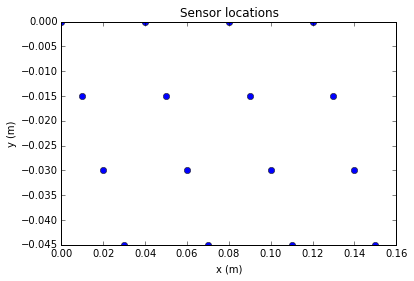

In [1242]:
# Sensor locations (spans an area of 150 x 45 mm = 0.150 x 0.045 meters)
sensorX = np.zeros((16,))
sensorY = np.zeros((16,))
for ch in range(16):
    sensorX[ch] += 10e-3*ch
for ch in range(4):
    sensor_dy = 15e-3 * (ch%4)
    sensorY[(ch%4)] -= sensor_dy
    sensorY[(ch%4)+4] -= sensor_dy
    sensorY[(ch%4)+8] -= sensor_dy
    sensorY[(ch%4)+12] -= sensor_dy
plt.plot(sensorX, sensorY, 'o')
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.title("Sensor locations")

(98,) (16, 98) (236, 16) (98,)


(-0.5, 2.0, -0.20000000000000001, 0.049999999999999989)

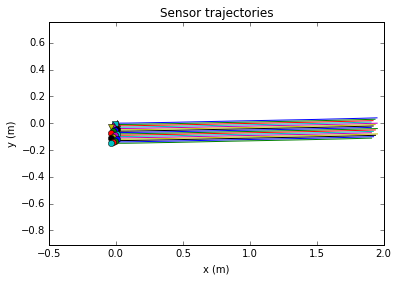

In [1243]:
# Trajectory for each ADC channel
# x,y refers to position of ADC channel 0
# X[0], Y[0] are the x and y vectors for ADC ch 0 
X = np.tile(x, (16,1))
Y = np.tile(y, (16,1))
print x.shape, X.shape, adc.shape, X[13].shape
# Rotate positions for ch[1:]
for J in range(len(x)): # Loop over trajectory points
    # Create grid of sensor points aligned with x and y axes
    for ch in range(16):
        X[ch][J] += 10e-3*ch
    for ch in range(4):
        sensor_dy = 15e-3 * (ch%4)
        Y[(ch%4)][J] -= sensor_dy
        Y[(ch%4)+4][J] -= sensor_dy
        Y[(ch%4)+8][J] -= sensor_dy
        Y[(ch%4)+12][J] -= sensor_dy
    # Rotate sensor points
    dx = X[0][J]  # dx, dy of ch[0] from origin
    dy = Y[0][J]
    for ch in range(16):
        # Translate ch0 point to origin
        X[ch][J] -= dx
        Y[ch][J] -= dy
        # Rotate points around the origin
        # -90 degrees because this is the orientation of the sensor relative to the heading
        rotated_x = X[ch][J] * np.cos(np.deg2rad(ori[J]-90)) - Y[ch][J] * np.sin(np.deg2rad(ori[J]-90))
        rotated_y = X[ch][J] * np.sin(np.deg2rad(ori[J]-90)) + Y[ch][J] * np.cos(np.deg2rad(ori[J]-90))       
        X[ch][J] = rotated_x
        Y[ch][J] = rotated_y
        # Un-translate points
        X[ch][J] += dx
        Y[ch][J] += dy
    
# Plot all trajectories
for x_ch, y_ch in zip(X,Y):
    plt.plot(x_ch, y_ch)
    plt.hold(True)
# Plot first points of trajectories
plt.plot(X[0][0], Y[0][0], '^')
plt.plot(X[1][0], Y[1][0], 's')
plt.plot(X[2][0], Y[2][0], 'd')
plt.plot(X[3][0], Y[3][0], 'v')
for I in range(4,16):
    plt.plot(X[I][0], Y[I][0], 'o')
#plt.plot(1,0.5, 'd')
# Label plot
plt.title('Sensor trajectories')
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.axis("equal")
#plt.xlim((0, 0.2))
#plt.ylim((-0.3, 0.3))

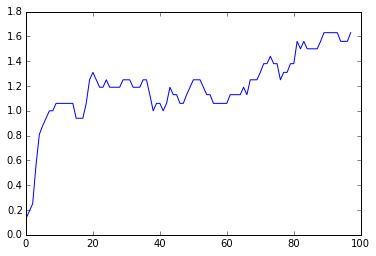

In [1244]:
plt.plot(ori)

In [1245]:
print adc[forw].shape
print x_flat.shape

(98, 16)
(4480,)


<matplotlib.colorbar.Colorbar instance at 0x13ef04170>

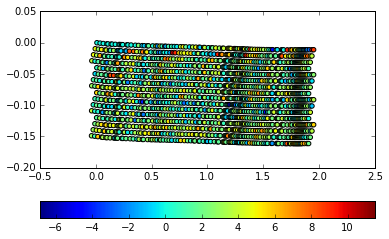

In [1246]:
# Compute height values
H = np.array(adc_to_h(adc[forw]))

# Flatten matrix to array
x_flat = X.flatten()
y_flat = Y.flatten()
h_flat = H.flatten()

# Rotate points
theta = -1.5 # degree
x_flat_rotated = []
y_flat_rotated = []
for x_f, y_f in zip(x_flat, y_flat):
    x_flat_rotated.append(x_f * np.cos(np.deg2rad(theta)) - y_f * np.sin(np.deg2rad(theta)))
    y_flat_rotated.append(x_f * np.sin(np.deg2rad(theta)) + y_f * np.cos(np.deg2rad(theta)))

# Plot the random data points
plt.scatter(x_flat_rotated, y_flat_rotated, c=h_flat)
#plt.axis([xmin, xmax, ymin, ymax])
#plt.axis([-0.1, 1.3, -0.2, 0.05])
#plt.ylim((-0.2, 0.05))
#plt.axis("equal")
plt.colorbar(orientation="horizontal")

[-0.1, 1.3, -0.2, 0.05]

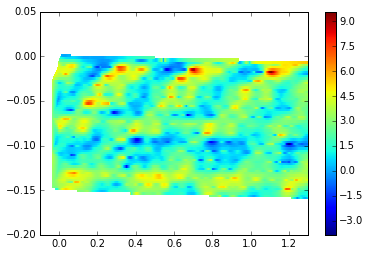

In [1247]:

# Size of regular grid
ny, nx = 100, 300

# Generate a regular grid to interpolate the data.
xmin = -0.1
xmax = 1.3
ymin = -0.2
ymax = 0.05
xi = np.linspace(xmin, xmax, nx)
yi = np.linspace(ymin, ymax, ny)
xi, yi = np.meshgrid(xi, yi)

# Interpolate using delaunay triangularization 
zi = mlab.griddata(x_flat_rotated, y_flat_rotated, h_flat, xi, yi)

# Plotef the results
plt.figure()
plt.pcolormesh(xi,yi,zi)
#plt.scatter(x_flat_rotated, y_flat_rotated, c=h_flat)
plt.colorbar()
plt.axis([xmin, xmax, ymin, ymax])

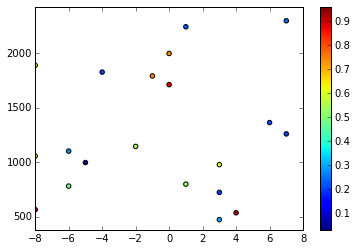

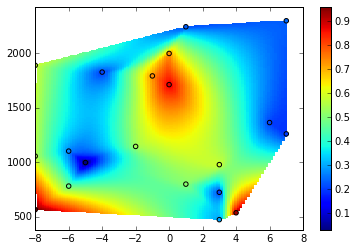

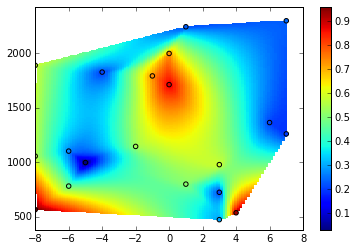

In [1248]:




# Bounds and number of the randomly generated data points
ndata = 20
xmin, xmax = -8, 8
ymin, ymax = 380, 2428

# Generate random data
x = np.random.randint(xmin, xmax, ndata)
y = np.random.randint(ymin, ymax, ndata)
z = np.random.random(ndata)

# Plot the random data points
plt.scatter(x,y,c=z)
plt.axis([xmin, xmax, ymin, ymax])
plt.colorbar()
plt.show()



# Size of regular grid
ny, nx = 512, 115

# Generate a regular grid to interpolate the data.
xi = np.linspace(xmin, xmax, nx)
yi = np.linspace(ymin, ymax, ny)
xi, yi = np.meshgrid(xi, yi)

# Interpolate using delaunay triangularization 
zi = mlab.griddata(x,y,z,xi,yi)

# Plot the results
plt.figure()
plt.pcolormesh(xi,yi,zi)
plt.scatter(x,y,c=z)
plt.colorbar()
plt.axis([xmin, xmax, ymin, ymax])
plt.show()




# Normalize coordinate system
def normalize_x(data):
    data = data.astype(np.float)
    return (data - xmin) / (xmax - xmin)

def normalize_y(data):
    data = data.astype(np.float)
    return (data - ymin) / (ymax - ymin)

x_new, xi_new = normalize_x(x), normalize_x(xi)
y_new, yi_new = normalize_y(y), normalize_y(yi)

# Interpolate using delaunay triangularization 
zi = mlab.griddata(x_new, y_new, z, xi_new, yi_new)

# Plot the results
plt.figure()
plt.pcolormesh(xi,yi,zi)
plt.scatter(x,y,c=z)
plt.colorbar()
plt.axis([xmin, xmax, ymin, ymax])
plt.show()